In [18]:
#import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # adjust configuration plot what will be create

# Read in the data 

df=pd.read_csv(r'/Users/agnieszkagresham/Desktop/movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  released    budget      gross             company  runtime  
0     June  19000000   46998772        Warner Bros.      146  
1     July   4500000   58853106   Columbia Pictures      104  
2     June  18000000  538375067           Lucasfilm      124  
3     July   3500000   83453539  Paramount Pictures       88  
4     July   6000000   39846344      Orion Pictures       98

In [151]:
# Cleaning data

# Looking for misssing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))


name - 0.0%
rating - 0.009780907668231613%
genre - 0.0%
year - 0.0%
released - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [152]:
# checking data types
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [114]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [154]:
#looking on all data view

pd.set_option('display.max_rows',None)


In [19]:
#looking for duplicats in data frame

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

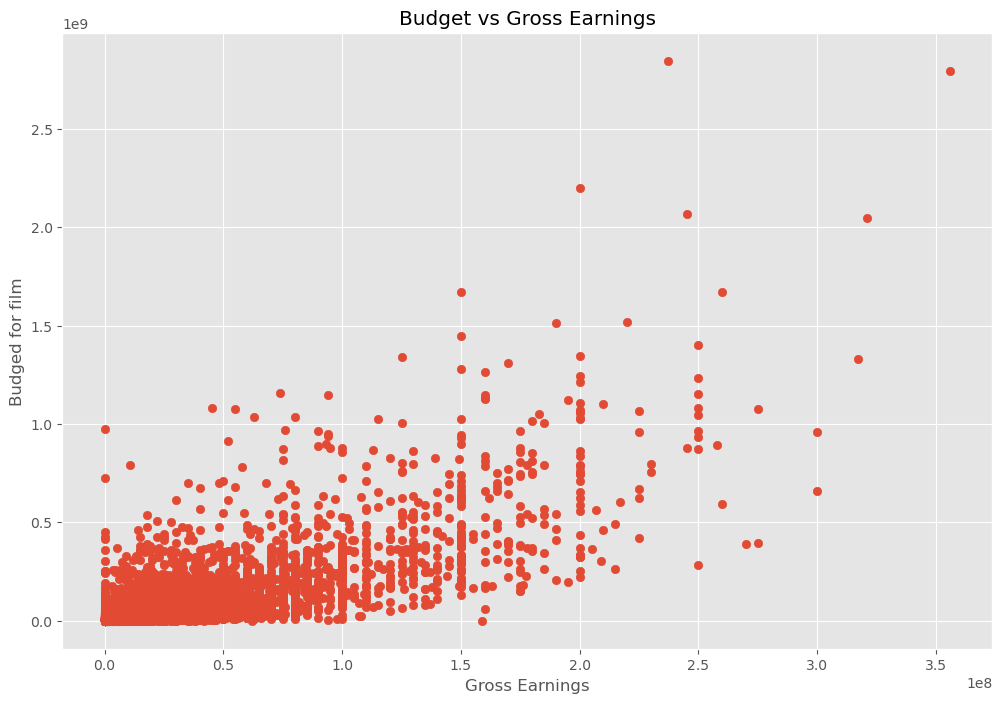

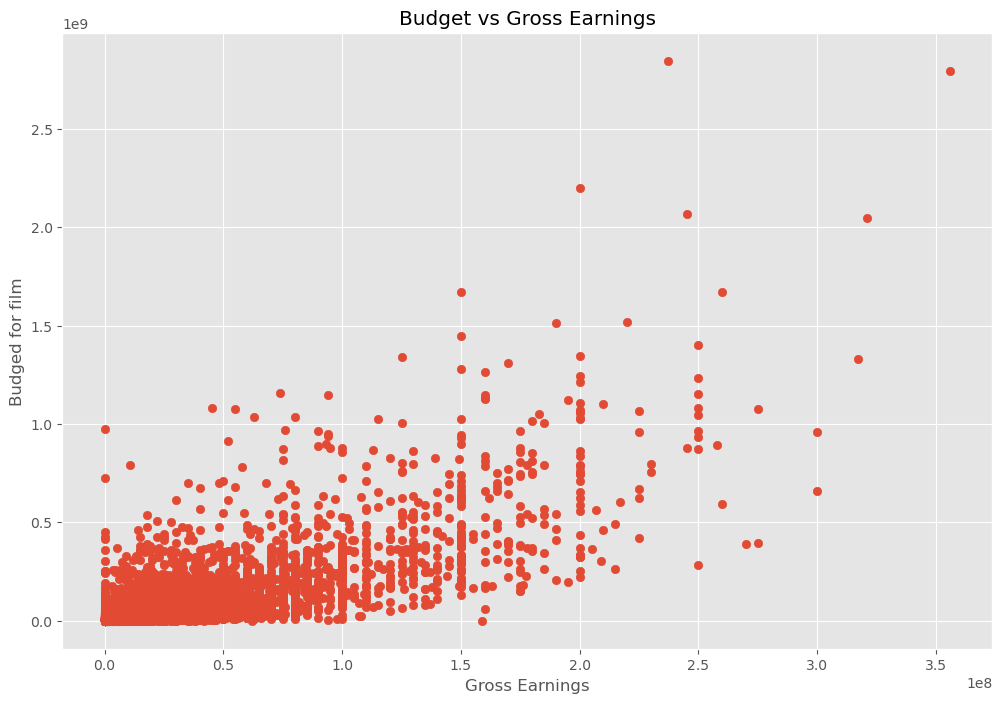

In [156]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budged for film')
plt.show(0)


In [118]:
# plot the budged vs gross usning seaborn

<Axes: xlabel='budget', ylabel='gross'>

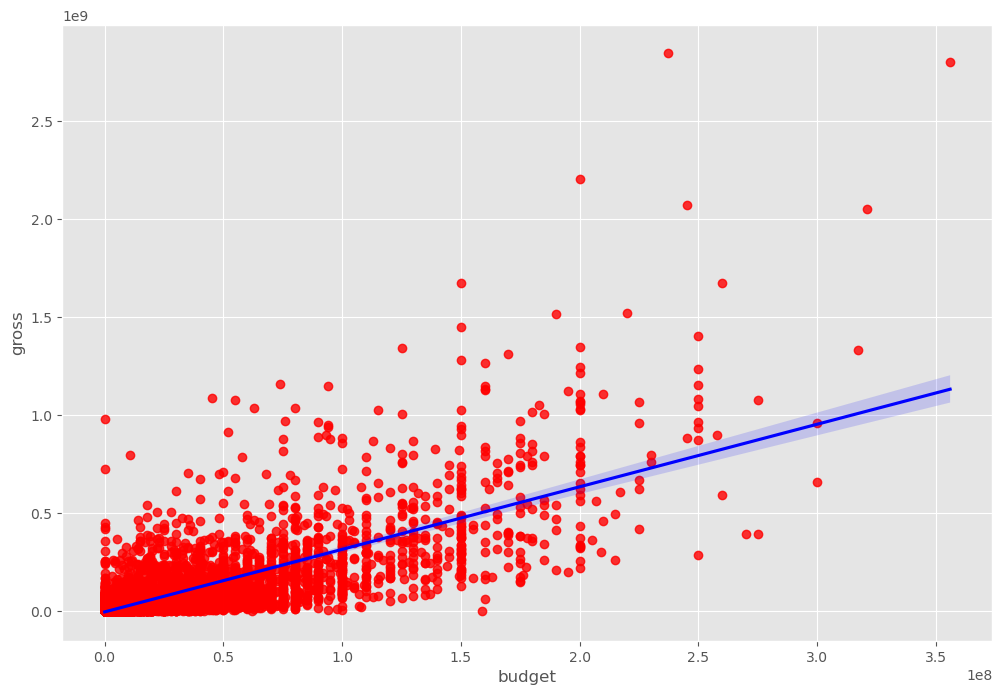

In [157]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"}, line_kws={"color": "blue"})

In [158]:
# lets start looking for colleration

df.columns = df.columns.str.strip()

In [159]:
print(df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'budget', 'gross',
       'company', 'runtime'],
      dtype='object')


In [160]:
correlation_matrix = df[['budget', 'gross', 'runtime',]].corr()
print(correlation_matrix)

           budget     gross   runtime
budget   1.000000  0.750157  0.268372
gross    0.750157  1.000000  0.244339
runtime  0.268372  0.244339  1.000000


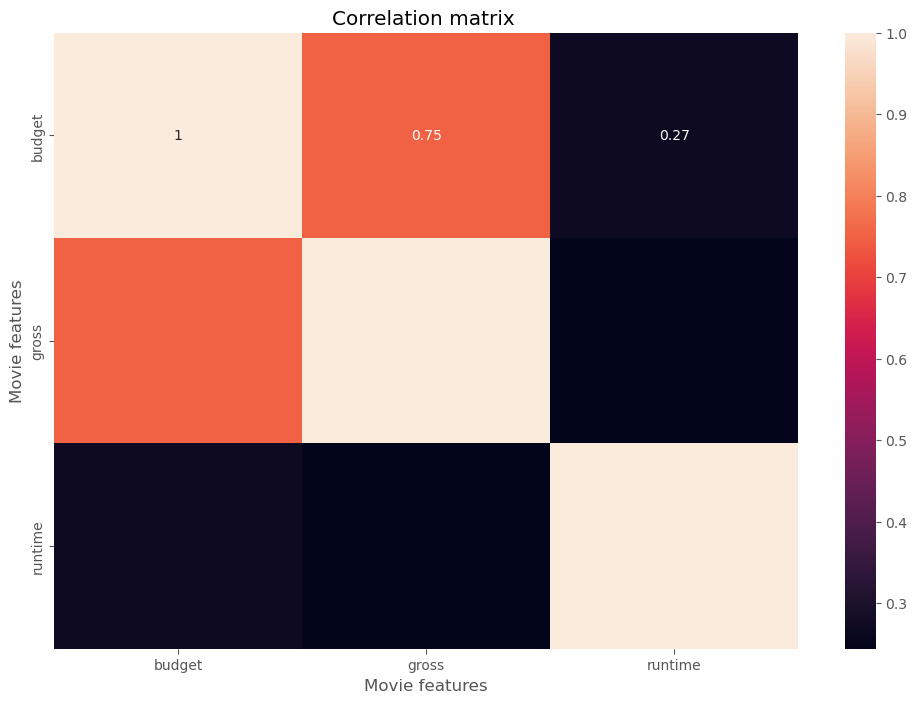

In [143]:
correlation_matrix = df[['budget', 'gross', 'runtime',]].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix ')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [20]:
df_numerize = df
for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
df_numerize.head()

name  rating  genre  year  released    budget      gross  company  runtime
0  6587       7      6  1980        15  19000000   46998772     2320      146
1  5573       7      1  1980        14   4500000   58853106      732      104
2  5142       5      0  1980        15  18000000  538375067     1541      124
3   286       5      4  1980        14   3500000   83453539     1813       88
4  1027       7      4  1980        14   6000000   39846344     1778       98

In [172]:
correlation_matrix2 = df_numerize.corr(method= 'pearson')
correlation_matrix2

name    rating     genre      year  released    budget  \
name      1.000000 -0.007293  0.016355  0.011453 -0.013132  0.020548   
rating   -0.007293  1.000000  0.064731  0.006617  0.011551 -0.074450   
genre     0.016355  0.064731  1.000000 -0.081261  0.027305 -0.334021   
year      0.011453  0.006617 -0.081261  1.000000 -0.002885  0.309212   
released -0.013132  0.011551  0.027305 -0.002885  1.000000  0.011545   
budget    0.020548 -0.074450 -0.334021  0.309212  0.011545  1.000000   
gross     0.006989 -0.089369 -0.234297  0.261900  0.002322  0.750157   
company   0.009212 -0.026577 -0.071066 -0.010433 -0.007622  0.186472   
runtime   0.008483  0.062761 -0.052914  0.116358  0.007999  0.268372   

             gross   company   runtime  
name      0.006989  0.009212  0.008483  
rating   -0.089369 -0.026577  0.062761  
genre    -0.234297 -0.071066 -0.052914  
year      0.261900 -0.010433  0.116358  
released  0.002322 -0.007622  0.007999  
budget    0.750157  0.186472  0.268372  
gross     1.000000  0.156743  0.244339  
company   0.156743  1.000000  0.037527  
runtime   0.244339  0.037527  1.000000

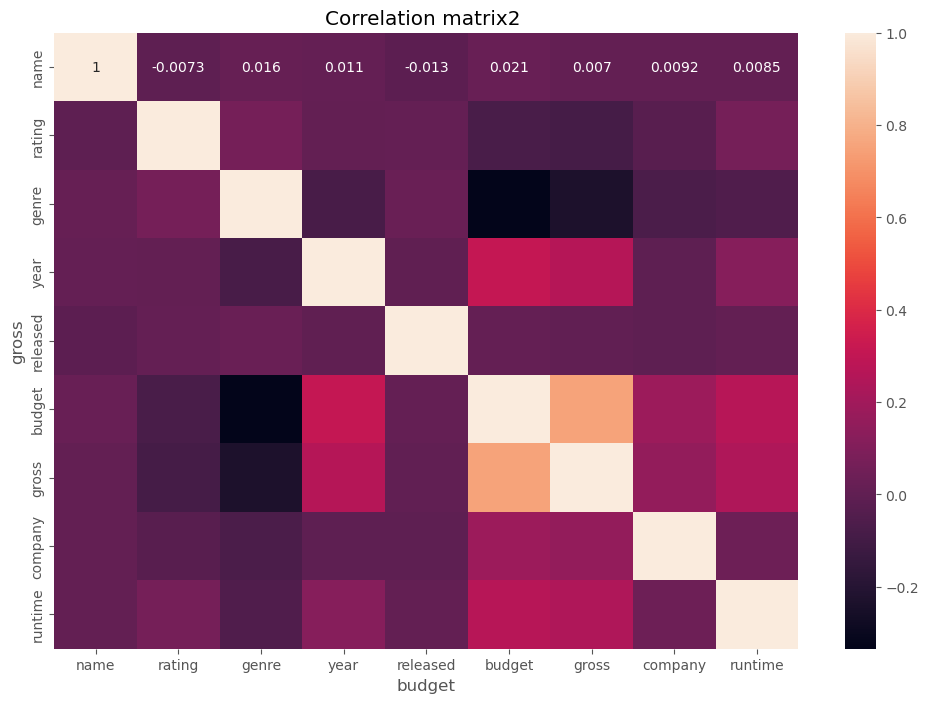

In [170]:
correlation_matrix2 = df_numerize.corr(method= 'pearson')
sns.heatmap(correlation_matrix2, annot = True)
plt.title('Correlation matrix2 ')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

In [173]:
corr_matrix2 = df_numerize.corr()
corr_pair = corr_matrix2.unstack()
corr_pair

name      name        1.000000
          rating     -0.007293
          genre       0.016355
          year        0.011453
          released   -0.013132
          budget      0.020548
          gross       0.006989
          company     0.009212
          runtime     0.008483
rating    name       -0.007293
          rating      1.000000
          genre       0.064731
          year        0.006617
          released    0.011551
          budget     -0.074450
          gross      -0.089369
          company    -0.026577
          runtime     0.062761
genre     name        0.016355
          rating      0.064731
          genre       1.000000
          year       -0.081261
          released    0.027305
          budget     -0.334021
          gross      -0.234297
          company    -0.071066
          runtime    -0.052914
year      name        0.011453
          rating      0.006617
          genre      -0.081261
          year        1.000000
          released   -0.002885
        

In [174]:
sorted_pairs = corr_pair.sort_values()
corr_pair


name      name        1.000000
          rating     -0.007293
          genre       0.016355
          year        0.011453
          released   -0.013132
          budget      0.020548
          gross       0.006989
          company     0.009212
          runtime     0.008483
rating    name       -0.007293
          rating      1.000000
          genre       0.064731
          year        0.006617
          released    0.011551
          budget     -0.074450
          gross      -0.089369
          company    -0.026577
          runtime     0.062761
genre     name        0.016355
          rating      0.064731
          genre       1.000000
          year       -0.081261
          released    0.027305
          budget     -0.334021
          gross      -0.234297
          company    -0.071066
          runtime    -0.052914
year      name        0.011453
          rating      0.006617
          genre      -0.081261
          year        1.000000
          released   -0.002885
        

In [175]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
released  released    1.000000
gross     gross       1.000000
budget    budget      1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# budget have highest correlation to gross earnings